## Question 1
### Counting the frequencies in a list using dictionary in Python Given an unsorted list of some elements 

In [1]:
from collections import Counter
from pprint import pprint # to print dictionary in numerical order
import json

In [2]:
list_num = [2,4,6,8,4,5,2,1,9,0,4,6,7,4,3,2,1,9,10,3,7,9,6,0,1,3,5,6,7,8,9,10,2,3,6,8,9,10,6,7,4,3]

In [3]:
#calculating an output for frequency of distinct elements 
list_dict = {num: list_num.count(num) for num in list_num}
pprint(list_dict) #for numerical order

{0: 2, 1: 3, 2: 4, 3: 5, 4: 5, 5: 2, 6: 6, 7: 4, 8: 3, 9: 5, 10: 3}


In [4]:
import matplotlib.pyplot as plt

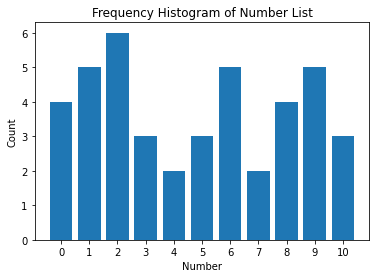

In [47]:
#Plotting frequency of ea. distinct element using dictionary 
plt.bar(range(len(list_dict)), list(list_dict.values()))
plt.xticks(range(len(list_dict)), list(list_dict.keys()).sort())
plt.title("Frequency Histogram of Number List")
plt.xlabel("Number")
plt.ylabel("Count")
plt.show()

In [6]:
jsonified_dict = json.dumps(list_dict)
print(jsonified_dict)

{"2": 4, "4": 5, "6": 6, "8": 3, "5": 2, "1": 3, "9": 5, "0": 2, "7": 4, "3": 5, "10": 3}


## Question 2
### Choice 2: How Much Have You Spent on Amazon? Analyze Amazon Data in different ways, plot your historical transactions amount. You can either summarize that into monthly payment, or show your mean payment, and so on. 

In [7]:
import pandas as pd
from datetime import datetime as dt

In [8]:
amazon_data = pd.read_csv('AmazonData.csv')

In [55]:
#inspect the data
amazon_data.tail()

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,...,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
339,2021-02-21,111-9988820-0818634,SOEOS Sichuan Pixian Broad Bean Paste with Chi...,SAUCE,B07SW185XV,50170000.0,Amazon.com,NaN,new,Natural Style USA,...,AMZN_US(TBA175085477404),$14.20,$0.00,14.20,NaN,NaN,NaN,Ozhan,USD,NaN
340,2021-03-01,111-0374278-8783414,"MIYA Gouache Paint Set, 24 Colors x 30ml Uniqu...",PAINT,B084YV6DXH,31210000.0,Amazon.com,NaN,new,Artsy Supplies,...,AMZN_US(TBA183457846204),$29.99,$1.71,31.70,False,NaN,False,Ozhan,USD,NaN
341,2021-03-03,113-6108987-0414610,"MIYA Gouache Paint Set, 24 Colors x 30ml Uniqu...",PAINT,B084YV6DXH,31210000.0,Amazon.com,NaN,new,Artsy Supplies,...,AMZN_US(TBA185504713804),$0.00,$0.00,0.00,NaN,NaN,NaN,Ozhan,USD,NaN
342,2021-03-05,111-5370934-7175459,"HIMI Gouache Paint Set, 24 Colors x 30ml Uniqu...",PAINT,B086WZCKCQ,31211500.0,Amazon.com,NaN,new,XSG,...,AMZN_US(TBA187878026104),$29.99,$1.80,31.79,False,NaN,False,Ozhan,USD,NaN
343,2021-03-11,111-8046325-9437053,Arm & Hammer Clean Burst Liquid Laundry Deterg...,LAUNDRY_DETERGENT,B0187S2XHO,47131811.0,Amazon.com,NaN,new,Amazon.com,...,AMZN_US(TBA194414480604),$5.99,$0.36,6.35,False,NaN,False,Ozhan,USD,NaN


In [10]:
print("I have purchased", len(amazon_data), "items since Jan 2017!")

I have purchased 344 items since Jan 2017!


In [11]:
# What columns are available in the dataset?
list(amazon_data.columns)

['Order Date',
 'Order ID',
 'Title',
 'Category',
 'ASIN/ISBN',
 'UNSPSC Code',
 'Website',
 'Release Date',
 'Condition',
 'Seller',
 'Seller Credentials',
 'List Price Per Unit',
 'Purchase Price Per Unit',
 'Quantity',
 'Payment Instrument Type',
 'Purchase Order Number',
 'PO Line Number',
 'Ordering Customer Email',
 'Shipment Date',
 'Shipping Address Name',
 'Shipping Address Street 1',
 'Shipping Address Street 2',
 'Shipping Address City',
 'Shipping Address State',
 'Shipping Address Zip',
 'Order Status',
 'Carrier Name & Tracking Number',
 'Item Subtotal',
 'Item Subtotal Tax',
 'Item Total',
 'Tax Exemption Applied',
 'Tax Exemption Type',
 'Exemption Opt-Out',
 'Buyer Name',
 'Currency',
 'Group Name']

In [12]:
type(amazon_data['Order Date'][0])

str

In [13]:
# Convert order date to DateTIme format so we can group by month and year
amazon_data['Order Date'] = amazon_data['Order Date'].astype('datetime64[ns]')

In [14]:
type(amazon_data['Order Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
#Item total is in string format, we want to remove '$' and make it numeric
amazon_data['Item Total'] = amazon_data['Item Total'].str.strip('$')

In [16]:
amazon_data.head()

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,...,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
0,2017-09-26,112-3458314-9301825,"Sally Hansen Instant Cuticle Remover, 1 Fluid ...",HEALTH_PERSONAL_CARE,B00CS65RNO,53131600.0,Amazon.com,NaN,new,oneofakinddeals,...,USPS(9400111899220402086985),$6.99,$0.00,6.99,NaN,NaN,NaN,Ozhan,USD,NaN
1,2017-09-26,112-4674148-8600220,INM Northern Lights Hologram Top Coat DUO,NAIL_POLISH,B00PJ690B0,53131638.0,Amazon.com,NaN,new,Nail Emporium,...,USPS(9400 1118 9956 4667 9639 34),$7.49,$0.00,7.49,NaN,NaN,NaN,Ozhan,USD,NaN
2,2017-09-26,112-6316417-0887425,Cuticle Pusher and Cutter - Professional Grade...,SCISSORS,B01E79ZI8I,53131600.0,Amazon.com,NaN,new,Utopia Deals,...,USPS(9374889678090352739919),$6.99,$0.00,6.99,NaN,NaN,NaN,Ozhan,USD,NaN
3,2017-09-26,112-6316417-0887425,Glass Cuticle Stick in Leather Case – Original...,HEALTH_PERSONAL_CARE,B017CHT81A,55111500.0,Amazon.com,NaN,new,Zamberg,...,USPS(9374889678090352739919),$8.96,$0.00,8.96,NaN,NaN,NaN,Ozhan,USD,NaN
4,2017-09-26,112-6316417-0887425,Bliss Kiss Simply Pure Cuticle & Nail Oil Pen ...,SKIN_MOISTURIZER,B00DYMYRX2,53131600.0,Amazon.com,NaN,new,Bliss Kiss,...,USPS(9374889678090352739919),$7.45,$0.00,7.45,NaN,NaN,NaN,Ozhan,USD,NaN


In [17]:
type(amazon_data['Item Total'][0])

str

In [19]:
#Converting from string format to numerical format to allow summation 
amazon_data['Item Total'] = amazon_data['Item Total'].astype(float)

In [20]:
type(amazon_data['Item Total'][0])

numpy.float64

In [26]:
#New data frame that groups by year then month and gives monthly sum of Item Total
amazon_grouped = amazon_data.groupby([amazon_data['Order Date'].dt.year,
                                    amazon_data['Order Date'].dt.month]).agg({'Item Total': sum})

In [32]:
amazon_grouped.head(43)

Item Total
Order Date Order Date            
2017       9                82.31
           10               40.93
           11              121.17
           12              117.84
2018       1               189.05
           2               126.36
           3               111.28
           4               297.87
           5               162.13
           6                66.15
           8                38.18
           9                55.26
           10                6.99
           11               51.04
           12               65.31
2019       1                79.94
           2                78.44
           3               344.01
           5               108.12
           7                40.08
           8                59.93
           9               127.49
           10               78.11
           11              305.73
           12              471.04
2020       1               224.06
           2               127.18
           3               210.25
           4               291.21
           5               324.22
           6               100.98
           7                63.90
           8               280.28
           9               394.82
           10               45.52
           11              363.30
           12              362.18
2021       1               261.30
           2                26.91
           3                69.84

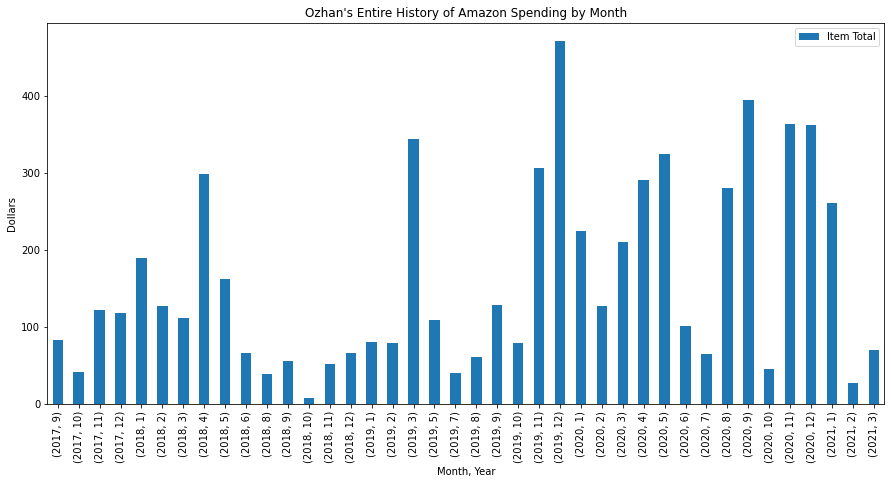

In [57]:
# Create figure for each month and year 
fig, ax = plt.subplots(figsize=(15,7))
amazon_grouped.plot.bar(ax=ax, title = "Ozhan's Entire History of Amazon Spending by Month")
ax.set_xlabel("Month, Year")
ax.set_ylabel("Dollars")
plt.show()

In [48]:
#Since 2017 and 2021 have only partial data, we will use 2018-2020
amazon_yearly = amazon_data.loc[(amazon_data['Order Date'] >= '2018-01-01') & 
                               (amazon_data['Order Date'] <= '2020-12-31')]
amazon_yearly = amazon_data.groupby([amazon_yearly['Order Date'].dt.year]).agg({'Item Total': sum})

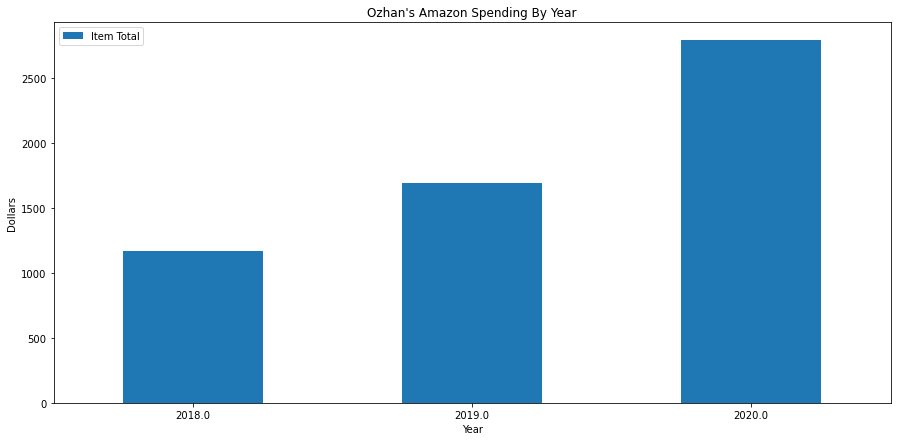

In [49]:
#Now we want to graph by just year, to compare spending in 2018 vs. 2019 vs. 2020 
fig, ax = plt.subplots(figsize = (15,7))
amazon_yearly.plot.bar(ax=ax, title = "Ozhan's Amazon Spending By Year")
plt.xticks(rotation="horizontal")
ax.set_xlabel("Year")
ax.set_ylabel("Dollars")
plt.show()